In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset C: Missing Data and Outliers

In [2]:
df = pd.read_csv('../Data/C_MissingFeatures.csv', index_col=0)
df.head()

,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,Fea7,Fea8,Fea9,Fea10,...,Fea492,Fea493,Fea494,Fea495,Fea496,Fea497,Fea498,Fea499,Fea500,classification
Sample1,0.0,0.0,0.0,0.0,3.931826,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,4.532599,0.0,0.0,0.0,0.000000,0.0,2
Sample2,0.0,0.0,0.0,0.0,3.713572,0.0,0.000000,2.70805,0.0,0.0,...,0.0,0.0,0.0,3.044522,0.0,0.0,0.0,0.000000,0.0,2
Sample3,0.0,0.0,0.0,0.0,3.218876,0.0,1.386294,0.00000,0.0,0.0,...,0.0,0.0,0.0,3.931826,0.0,0.0,0.0,0.000000,0.0,2
Sample4,0.0,0.0,0.0,0.0,3.433987,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,3.258097,0.0,0.0,0.0,0.693147,0.0,2
Sample5,0.0,0.0,0.0,0.0,3.951244,0.0,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,3.761200,0.0,0.0,0.0,0.000000,0.0,2


(a) Summarise the missing data in this dataset. In your report, identify which features are affected.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, Sample1 to Sample408
Columns: 501 entries, Fea1 to classification
dtypes: float64(500), int64(1)
memory usage: 1.6+ MB


In [4]:
# Get columns with missing values
missing_columns = df.columns[df.isna().any()]
missing_columns

Index(['Fea58', 'Fea142', 'Fea150', 'Fea233', 'Fea269', 'Fea299', 'Fea339',
       'Fea355', 'Fea458', 'Fea466', 'Fea491'],
      dtype='object')

In [5]:
# Find missingness in each affected column
print('Column\tNum Missing')
for col in missing_columns:
    print(f'{col}\t{df[col].isna().sum()}')

Column	Num Missing
Fea58	5
Fea142	5
Fea150	5
Fea233	5
Fea269	5
Fea299	5
Fea339	5
Fea355	5
Fea458	5
Fea466	5
Fea491	5


In [6]:
# Get rows with missing values
missing_rows = df.index[df.isna().any(axis=1)]
missing_rows

Index(['Sample138', 'Sample143', 'Sample231', 'Sample263', 'Sample389'], dtype='object')

In [7]:
# Find missingness in df
df[df.index.isin(missing_rows)][missing_columns]

,Fea58,Fea142,Fea150,Fea233,Fea269,Fea299,Fea339,Fea355,Fea458,Fea466,Fea491
Sample138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Find missingness in each affected row
print('Row\tNum Missing')
for row in missing_rows:
    print(f'{row}\t{df.loc[row].isna().sum()}')

Row	Num Missing
Sample138	11
Sample143	11
Sample231	11
Sample263	11
Sample389	11


(b) In your report, describe two methods for imputing missing values across multiple features: one static and one model-based. Outline the pros and cons for both. Briefly describe the advantages of using a multiple imputation.

**Approach 1: Static Imputation**\
For example, impute the missing values with the mean of the feature.\
Pros:
- Simple to implement
- Fast to compute
- Easy to interpret

Cons:
- Ignores the relationship between features
- Ignores the relationship between feature and target variable
- May introduce bias

**Approach 2: Model-based Imputation**\
For example, impute the missing values with the predicted values from a regression model, where the model is trained on the available data.\
Pros:
- Takes into account the relationship between features
- Takes into account the relationship between feature and target variable
- May reduce bias (compared to static imputation)

Cons:
- More complex to implement
- Slower to compute
- May overfit the data

**Advantages of Multiple Imputation**\
Multiple imputation is one of the state-of-the-art techniques that imputes missing values multiple times, and then combines the results. The technique is rooted in Bayesian methodology and so the imputed values also have a measure of uncertainty attached.\
Advantages:
- Takes into account the relationship between features
- Takes into account the relationship between feature and target variable
- Reduces bias
- Reduces variance
- Provides uncertainty estimates

(c) Perform the imputation using an appropriate model-based approach. In your report, justify the model you have chosen to use and compare the original and imputed distributions.

In [9]:
# Find best model for imputation by perfoming cross-validation
# Random forest regressor, gradient boosting regressor

In [10]:
X = df.drop(columns=missing_columns)
y = df[missing_columns]

X_train = X[~X.index.isin(missing_rows)]
X_to_pred = X[X.index.isin(missing_rows)]
y_train = y[~y.index.isin(missing_rows)]
y_to_pred = y[y.index.isin(missing_rows)]

print(X_train.shape)
print(y_train.shape)
print(X_to_pred.shape)
print(y_to_pred.shape)

(403, 490)
(403, 11)
(5, 490)
(5, 11)


In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

def score_model(model, X_train, y_train):
    model.random_state = 42
    cv = 3
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', return_train_score=True)
    print(f'Model: {model}')
    print(f'Mean Validation Score: {cv_results['test_score'].mean()}')
    print(f'Mean Train Score: {cv_results['train_score'].mean()}')
    print(f'Average time: {cv_results['fit_time'].mean()}\n')
    
# max score wins (i.e. least negative)
score_model(RandomForestRegressor(), X_train, y_train)
score_model(MultiOutputRegressor(GradientBoostingRegressor()), X_train, y_train)
score_model(MultiOutputRegressor(KNeighborsRegressor()), X_train, y_train)
score_model(MultiOutputRegressor(LinearRegression()), X_train, y_train)
score_model(MultiOutputRegressor(MLPRegressor()), X_train, y_train)
score_model(MultiOutputRegressor(SVR()), X_train, y_train)

Model: RandomForestRegressor(random_state=42)
Mean Validation Score: -0.5425379306422965
Mean Train Score: -0.2059369198139941
Average time: 4.163092931111653

Model: MultiOutputRegressor(estimator=GradientBoostingRegressor())
Mean Validation Score: -0.6157735421788353
Mean Train Score: -0.10760998428730244
Average time: 11.417449712753296

Model: MultiOutputRegressor(estimator=KNeighborsRegressor())
Mean Validation Score: -0.5728448373195015
Mean Train Score: -0.4691506172012509
Average time: 0.061304569244384766

Model: MultiOutputRegressor(estimator=LinearRegression())
Mean Validation Score: -1.1366619743086215
Mean Train Score: -2.5853364865088146e-15
Average time: 0.5439013640085856



/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MultiOutputRegressor(estimator=MLPRegressor())
Mean Validation Score: -0.9475284392591238
Mean Train Score: -0.032142511871722027
Average time: 8.120309750239054

Model: MultiOutputRegressor(estimator=SVR())
Mean Validation Score: -0.5696394278796078
Mean Train Score: -0.47427949475347414
Average time: 0.16472736994425455



In [12]:
# use Random Forest Regressor to impute missing values
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_to_pred)
y_pred

array([[0.03332205, 4.28155249, 0.05192957, 0.60067004, 0.14135823,
        0.        , 1.78820426, 0.01098612, 0.82495304, 0.06068426,
        0.        ],
       [0.02564949, 4.26115656, 0.05347108, 1.15897739, 0.05545177,
        0.01386294, 1.67772485, 0.        , 0.74136553, 0.08322637,
        0.02079442],
       [0.03178054, 3.86932875, 0.00693147, 0.60087796, 0.15741422,
        0.        , 1.83463685, 0.        , 1.23003149, 0.10909985,
        0.01098612],
       [0.02397895, 4.17646071, 0.        , 0.6877882 , 0.18526433,
        0.        , 1.99730401, 0.        , 1.0976165 , 0.09064158,
        0.        ],
       [0.03663562, 4.45323999, 0.02302585, 0.74540362, 0.03637586,
        0.        , 2.17548257, 0.        , 0.62626929, 0.08068403,
        0.        ]])

In [13]:
# convert predictions to dataframe with correct index and column names
y_pred = pd.DataFrame(y_pred, index=y_to_pred.index, columns=y_to_pred.columns)

# assign imputed values to df
imputed = df.copy()
imputed.loc[y_pred.index, y_pred.columns] = y_pred

In [14]:
# check for missing values (check assignment was correct)
imputed.columns[imputed.isna().any()]

Index([], dtype='object')

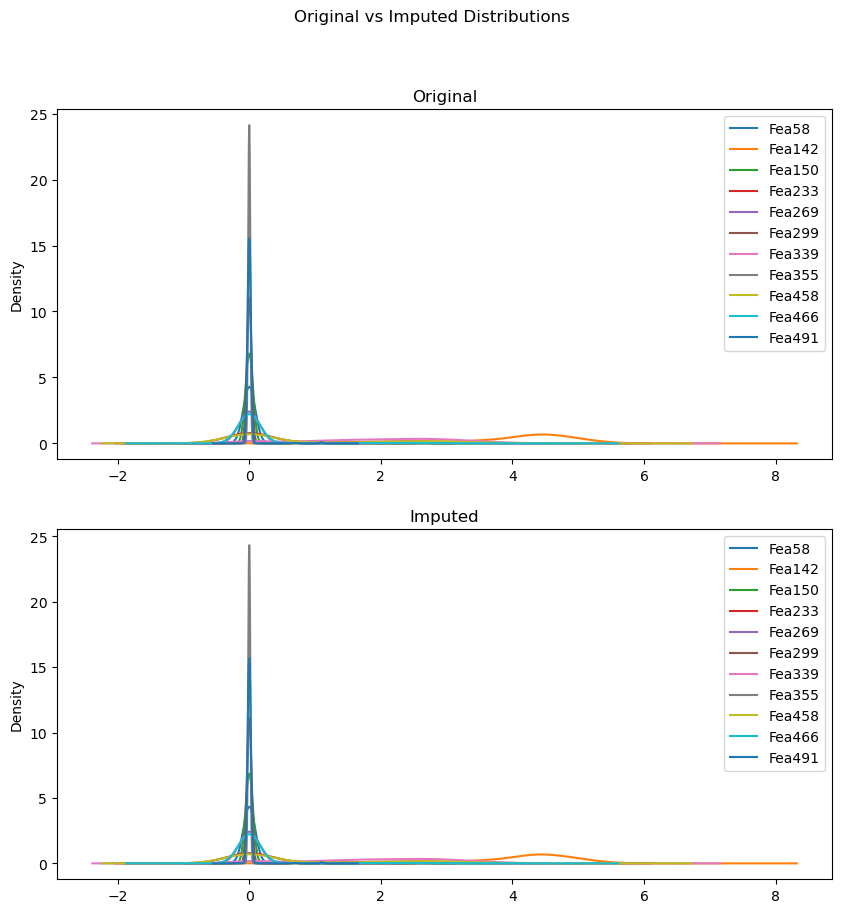

In [15]:
# compare original and imputed distributions
# only interested in features that have had values imputed

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plt.suptitle('Original vs Imputed Distributions')

# plot original distributions
for col in missing_columns:
    df[col].plot.kde(ax=axes[0], label=col)
axes[0].legend()
axes[0].set_title('Original')

# plot imputed distributions
for col in missing_columns:
    imputed[col].plot.kde(ax=axes[1], label=col)
axes[1].legend()
axes[1].set_title('Imputed')

plt.savefig('../Plots/Q3c_original_vs_imputed_dists.png')
plt.show()

In [16]:
# Print means of original and imputed columns and difference
print('Column\tOrig\tImputed\tDifference')
for col in missing_columns:
    mean_original = df[col].mean()
    mean_imputed = imputed[col].mean()
    print(f'{col}\t{mean_original:.4f}\t{mean_imputed:.4f}\t{mean_imputed - mean_original:.10f}')

Column	Orig	Imputed	Difference
Fea58	0.0380	0.0379	-0.0000949709
Fea142	4.2869	4.2859	-0.0009626725
Fea150	0.0212	0.0212	0.0000725165
Fea233	0.7426	0.7428	0.0001973777
Fea269	0.1159	0.1159	-0.0000092994
Fea299	0.0103	0.0102	-0.0000924904
Fea339	1.9185	1.9182	-0.0002918596
Fea355	0.0027	0.0027	-0.0000064811
Fea458	0.8376	0.8385	0.0008138403
Fea466	0.1332	0.1326	-0.0005919191
Fea491	0.0072	0.0072	-0.0000100004


(d) Implement a standardisation approach to detect outliers. In your report, explain how the standardisation approach works and identify the outliers you have found.

In [17]:
# assume working with imputed dataset now
df = imputed.copy()

# Calculate z-scores for each feature (which is Normally distributed)
z_scores = (df - df.mean()) / df.std()

# Identify outliers by having z-score greater than some threshold
threshold = 3
outliers = z_scores > abs(threshold)

# Investigate outliers
outliers.sum()

Fea1               6
Fea2              15
Fea3               8
Fea4               1
Fea5               0
                  ..
Fea497             1
Fea498             8
Fea499            15
Fea500             0
classification     0
Length: 501, dtype: int64

In [18]:
# Print some details
print(f'Number of outliers: {outliers.sum().sum()}')
print(f'Number of values: {outliers.size}')
print(f'Percentage of outliers: {outliers.sum().sum() / outliers.size * 100:.3f}%')

Number of outliers: 2659
Number of values: 204408
Percentage of outliers: 1.301%


In [19]:
# Get list of features with outliers
outlier_columns = outliers.columns[outliers.any()]
print(f'Number of features with outliers: {len(outlier_columns)}')

# Get list of rows with outliers
outlier_rows = outliers.index[outliers.any(axis=1)]
print(f'Number of rows with outliers: {len(outlier_rows)}')

Number of features with outliers: 359
Number of rows with outliers: 407


In [20]:
outliers.shape

(408, 501)

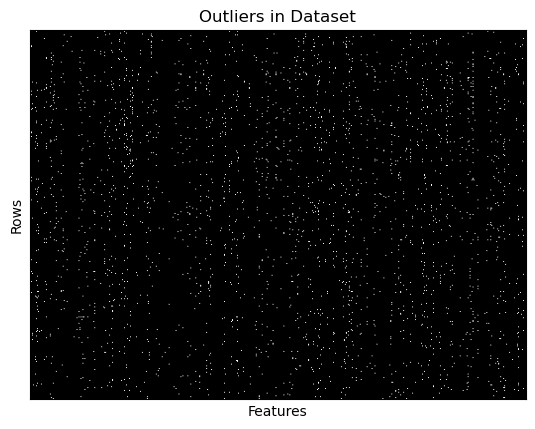

In [21]:
plt.imshow(outliers, aspect='auto', cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Outliers in Dataset')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.savefig('../Plots/Q3d_outliers.png')
plt.show()

(e) Implement a model-based approach to correct for outlier values. In your report, justify the approach and compare the original and imputed distributions.

In [22]:
df_outliers_replaced = df.copy()

# set outliers to nan (to be imputed later)
df_outliers_replaced[outliers] = np.nan

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# took too long
# imputer = IterativeImputer(GradientBoostingRegressor(), random_state=42)

# took too long also
# imputer = IterativeImputer(RandomForestRegressor(), random_state=42)

# decent time and validation score (see above)
imputer = IterativeImputer(KNeighborsRegressor(), random_state=42)

# impute missing values
X_imputed = imputer.fit_transform(df_outliers_replaced)
df_outliers_replaced = pd.DataFrame(X_imputed, index=df.index, columns=df.columns)

In [25]:
# get top 5 features with most outliers
top5 = outliers.sum().sort_values(ascending=False).index[:5]
top5

Index(['Fea448', 'Fea96', 'Fea323', 'Fea320', 'Fea366'], dtype='object')

In [26]:
df_outliers_replaced[top5].sum()

Fea448     0.000000
Fea96      0.000000
Fea323     0.000000
Fea320     0.000000
Fea366    31.614945
dtype: float64

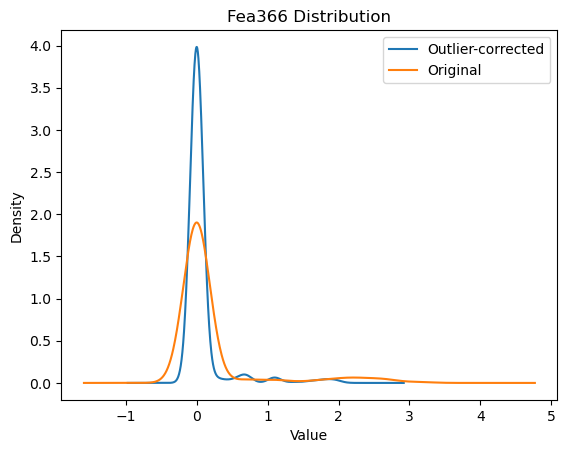

In [27]:
# Cannot plot density of features with all values equalling zero
df_outliers_replaced['Fea366'].plot.kde(label='Outlier-corrected')
df['Fea366'].plot.kde(label='Original')
plt.title('Fea366 Distribution')
plt.xlabel('Value')
plt.legend()
plt.savefig('../Plots/Q3e_Fea366_dist.png')
plt.show()

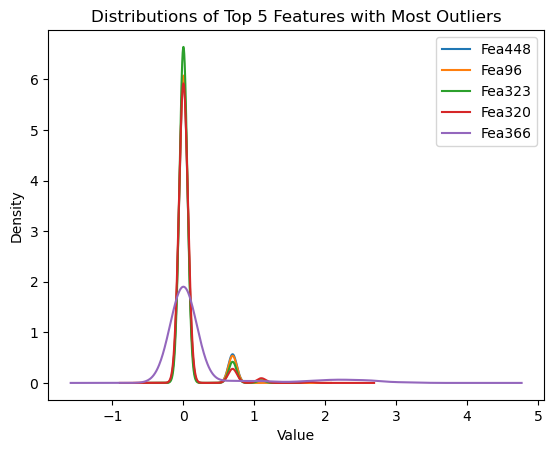

In [28]:
df[top5].plot.kde()
plt.title('Distributions of Top 5 Features with Most Outliers')
plt.savefig('../Plots/Q3e_top5_outliers_original.png')
plt.xlabel('Value')
plt.show()